In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
RND_STATE = 55324

In [2]:
AH_data = pd.read_csv("data/tree_addhealth.csv")
data_clean = AH_data.dropna()
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [3]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


In [4]:
predictors = data_clean[['BIO_SEX', 'HISPANIC', 'WHITE', 'BLACK', 'NAMERICAN', 'ASIAN', 'age',
                         'ALCEVR1', 'ALCPROBS1', 'marever1', 'cocever1', 'inhever1', 'cigavail', 'DEP1', 'ESTEEM1',
                         'VIOL1',
                         'PASSIST', 'DEVIANT1', 'SCHCONN1', 'GPA1', 'EXPEL1', 'FAMCONCT', 'PARACTV', 'PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4, random_state=RND_STATE)

print("Predict train shape: ", pred_train.shape)
print("Predict test shape: ", pred_test.shape)
print("Target train shape: ", tar_train.shape)
print("Target test shape: ", tar_test.shape)

Predict train shape:  (2745, 24)
Predict test shape:  (1830, 24)
Target train shape:  (2745,)
Target test shape:  (1830,)


In [5]:
classifier = RandomForestClassifier(n_estimators=25, random_state=RND_STATE)
classifier = classifier.fit(pred_train, tar_train)

predictions = classifier.predict(pred_test)

In [6]:
print("Confusion matrix:")
print(confusion_matrix(tar_test, predictions))
print()
print("Accuracy: ", accuracy_score(tar_test, predictions))

Confusion matrix:
[[1418   94]
 [ 208  110]]

Accuracy:  0.8349726775956284


In [7]:
important_features = pd.Series(data=classifier.feature_importances_,index=predictors.columns)
important_features.sort_values(ascending=False,inplace=True)

In [8]:
important_features

marever1     0.096374
age          0.083599
DEVIANT1     0.080081
SCHCONN1     0.075221
GPA1         0.074775
DEP1         0.071728
FAMCONCT     0.067389
PARACTV      0.063784
ESTEEM1      0.057945
ALCPROBS1    0.057670
VIOL1        0.048614
ALCEVR1      0.043539
PARPRES      0.039425
WHITE        0.022146
cigavail     0.021671
BLACK        0.018512
BIO_SEX      0.014942
inhever1     0.012832
cocever1     0.012590
PASSIST      0.010221
EXPEL1       0.009777
HISPANIC     0.007991
NAMERICAN    0.005332
ASIAN        0.003844
dtype: float64

In [9]:
model = ExtraTreesClassifier(random_state=RND_STATE)
model.fit(pred_train, tar_train)

ExtraTreesClassifier(random_state=55324)

In [10]:
print(model.feature_importances_)

[0.02477172 0.01425117 0.02652112 0.01932494 0.00776148 0.00596326
 0.0620533  0.05350958 0.0488245  0.11525204 0.01815499 0.01784829
 0.02657282 0.05793307 0.0529187  0.05255845 0.01607589 0.06814914
 0.06217983 0.07360458 0.01143425 0.05815513 0.05710471 0.04907707]


In [11]:
trees = range(25)
accuracy = np.zeros(25)
for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=idx + 1, random_state=RND_STATE)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)
    accuracy[idx] = accuracy_score(tar_test, predictions)

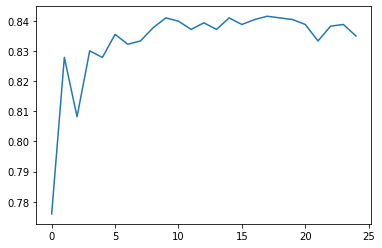

In [12]:
plt.cla()
plt.plot(trees, accuracy)
plt.show()